In [1]:
!pip install pymesh --user

In [5]:
import os

input_name = "CFD-AF-200-228-N"

data_path = os.path.join("data", "neutral_images_3d", input_name)

In [8]:
!pip install open3d

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 62.2/62.2 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 10.2/10.2 MB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 101.8/101.8 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 15.6/15.6 MB 3.5 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.8.0
    Uninstalling nbformat-5.8.0:
      Successfully uninstalled nbformat-5.8.0


In [12]:
import open3d as o3d

obj_file_path = os.path.join(data_path, input_name + ".obj")
ply_file_path = os.path.join(data_path, input_name + ".ply")

mesh = o3d.io.read_triangle_mesh(obj_file_path)

point_cloud = o3d.geometry.PointCloud()
point_cloud.points = mesh.vertices

o3d.io.write_point_cloud(ply_file_path, point_cloud)

True

In [20]:
import numpy as np

vertices = np.array(mesh.vertices)

In [21]:
vertices.shape

(5118, 3)

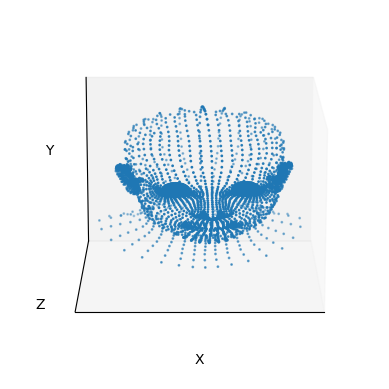

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = vertices[:, 0]
y = vertices[:, 1]
z = vertices[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, z, y, s=1)

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.view_init(elev=15, azim=-270)

In [56]:
import math

math.sqrt(len(vertices))

71.54019849007969

In [72]:
import cv2

depth_image_path = os.path.join(data_path, input_name + "_depth.jpg")

depth_image = plt.imread(depth_image_path)

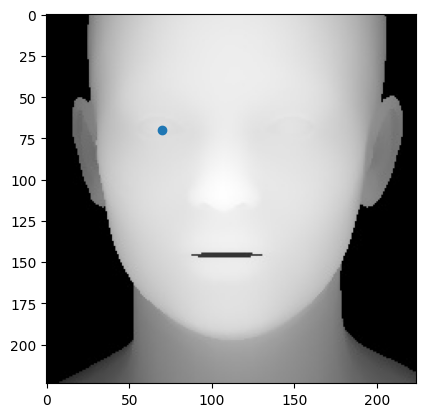

In [79]:
plt.imshow(depth_image)

plt.scatter(70, 70)

In [82]:
depth_image[70, 70]

array([222, 222, 222], dtype=uint8)

In [85]:
!pip install pywavelets

TypeError: Invalid shape (224, 112, 2) for image data

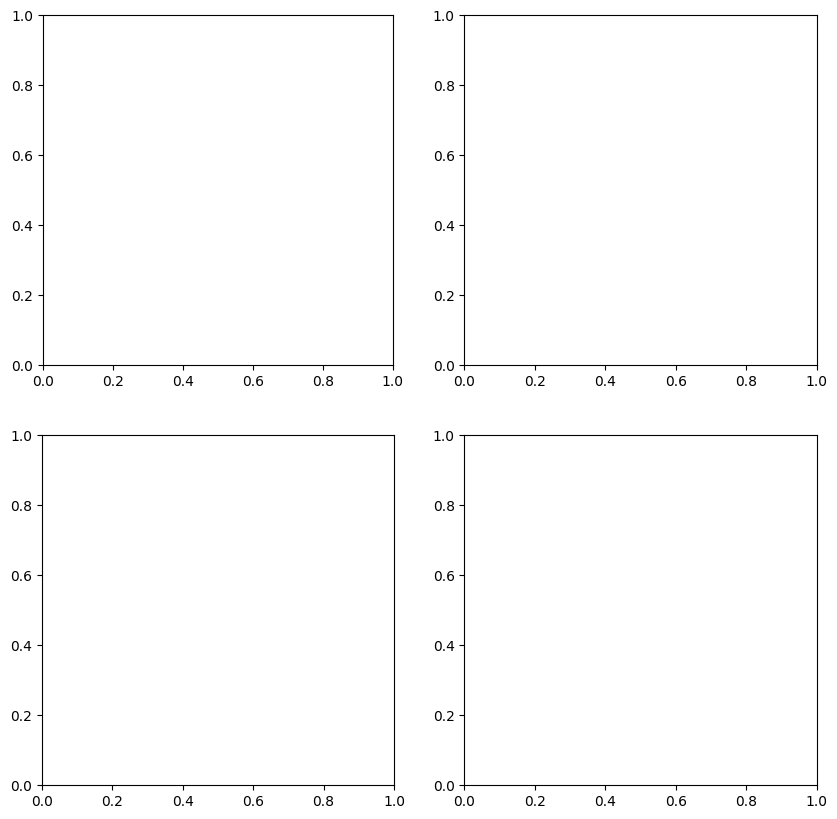

In [90]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'image' is your depth image loaded as a numpy array of dtype uint8
# For example: image = cv2.imread('depth_image.jpg', cv2.IMREAD_GRAYSCALE)

# Choose a wavelet
wavelet = 'db1'  # This is the Daubechies wavelet with one vanishing moment. You can choose another.

# Choose the number of decomposition levels 'n'
n = 2  # Replace with the number of levels you want to use

# Compute the wavelet decomposition up to level n
max_level = pywt.dwt_max_level(data_len=min(depth_image.shape), filter_len=pywt.Wavelet(wavelet).dec_len)

coeffs = pywt.wavedec2(depth_image, wavelet, level=max_level)

# coeffs is a list of coefficients arranged in the following way:
# [cAn, (cHn, cVn, cDn), ..., (cH1, cV1, cD1)]
# where cAn is the approximation coefficients at level n
# cHn, cVn, cDn are the horizontal, vertical, and diagonal detail coefficients at level n

# You can process or analyze these coefficients as needed for your application

# Let's visualize the approximation and details coefficients for the first level
cA, (cH, cV, cD) = coeffs[0], coeffs[1]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cA, cmap='gray')
axs[0, 0].set_title('Approximation')
axs[0, 0].axis('off')

axs[0, 1].imshow(cH, cmap='gray')
axs[0, 1].set_title('Horizontal Detail')
axs[0, 1].axis('off')

# axs[1, 0].imshow(cV, cmap='gray')
# axs[1, 0].set_title('Vertical Detail')
# axs[1, 0].axis('off')

# axs[1, 1].imshow(cD, cmap='gray')
# axs[1, 1].set_title('Diagonal Detail')
# axs[1, 1].axis('off')

plt.show()

In [93]:
len(coeffs)

2